In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sgl

## 1

递推计算单位脉冲和单位阶跃响应的脚本如下：

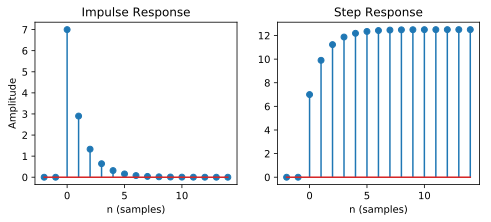

In [2]:
nf = 15
n = np.arange(-2,nf,dtype=int)
x1 = np.zeros(len(n),dtype=float)
x1[2] = 1.0    # Impulse function
x2 = np.zeros(len(n),dtype=float)
x2[2:nf+3] = 1.0    #Step function

y1 = np.zeros(len(n),dtype=float)
y2 = np.zeros(len(n),dtype=float)
for k in range(2,nf+2):
    y1[k]=7*x1[k]-2*x1[k-1]+0.7*y1[k-1]-0.1*y1[k-2]
    y2[k]=7*x2[k]-2*x2[k-1]+0.7*y2[k-1]-0.1*y2[k-2]

fig, ax = plt.subplots(1,2,figsize=(8.0, 3.0))
ax[0].stem(n,y1)
ax[0].set_xlabel('n (samples)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Impulse Response')
ax[1].stem(n,y2)
ax[1].set_xlabel('n (samples)')
ax[1].set_title('Step Response')
plt.show()

也可用`lfilter`得到单位脉冲和单位阶跃响应：

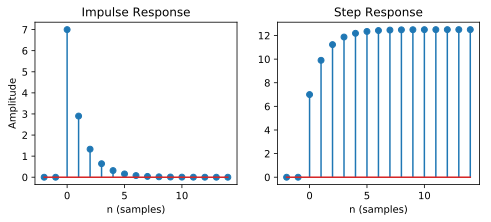

In [3]:
a = np.array([1,-0.7,0.1])
b = np.array([7,-2,0])
y1 = sgl.lfilter(b,a,x1)
y2 = sgl.lfilter(b,a,x2)

fig, ax = plt.subplots(1,2,figsize=(8.0, 3.0))
ax[0].stem(n,y1)
ax[0].set_xlabel('n (samples)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Impulse Response')
ax[1].stem(n,y2)
ax[1].set_xlabel('n (samples)')
ax[1].set_title('Step Response')
plt.show()

可以看到和我们递推的结果相同。以下脚本计算系统对输入信号的响应：

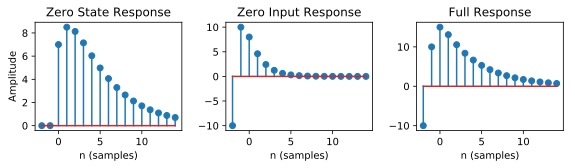

In [4]:
x = np.zeros(len(n),dtype=float)
xz = np.zeros(len(n),dtype=float)
x[0] = x[1] = 0
x[2:nf+2] = 0.8**(np.arange(0,nf))    # Input signal
yzi = np.zeros(len(n),dtype=float)
yzs = np.zeros(len(n),dtype=float)
yzi[0] = -10
yzi[1] = 10    # Initial state
for k in range(2,nf+2):
    yzs[k]=7*x[k]-2*x[k-1]+0.7*yzs[k-1]-0.1*yzs[k-2]
    yzi[k]=7*xz[k]-2*xz[k-1]+0.7*yzi[k-1]-0.1*yzi[k-2]

fig, ax = plt.subplots(1,3,figsize=(9.5, 2.0))
ax[0].stem(n,yzs)
ax[0].set_xlabel('n (samples)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Zero State Response')
ax[1].stem(n,yzi)
ax[1].set_xlabel('n (samples)')
ax[1].set_title('Zero Input Response')
ax[2].stem(n,yzi+yzs)
ax[2].set_xlabel('n (samples)')
ax[2].set_title('Full Response')
fig.subplots_adjust(wspace=0.3)
plt.show()

用`lfilter`得到的结果如下，与上面的结果一致：

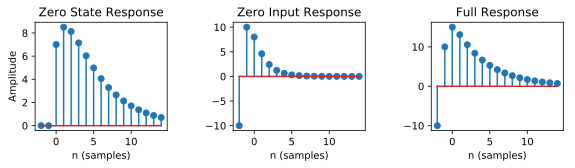

In [5]:
zi = sgl.lfiltic(b,a,[10,-10])
yzs = sgl.lfilter(b,a,x)
yzio = sgl.lfilter(b,a,xz,-1,zi)
yzi = np.concatenate([[-10,10],yzio[0][0:15]])

fig, ax = plt.subplots(1,3,figsize=(9.5, 2.0))
ax[0].stem(n,yzs)
ax[0].set_xlabel('n (samples)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Zero State Response')
ax[1].stem(n,yzi)
ax[1].set_xlabel('n (samples)')
ax[1].set_title('Zero Input Response')
ax[2].stem(n,yzs+yzi)
ax[2].set_xlabel('n (samples)')
ax[2].set_title('Full Response')
fig.subplots_adjust(wspace=0.5)
plt.show()

## 2

将方程

$$y''\left( t \right) + 5y'\left( t \right) + 6y\left( t \right) = 2x'\left( t \right) + 8x\left( t \right)$$

后向差分离散化为

$$\frac{{y\left[ n \right] - 2y\left[ {n - 1} \right] + y\left[ {n - 2} \right]}}{{\Delta {t^2}}} + 5\frac{{y\left[ {n - 1} \right] - y\left[ {n - 2} \right]}}{{\Delta t}} + 6y\left[ {n - 1} \right] = 2\frac{{x\left[ {n - 1} \right] - x\left[ {n - 2} \right]}}{{\Delta t}} + 8x\left[ {n - 1} \right]$$

即

$$y\left[ n \right] + \left( { - 2 + 5\Delta t + 6\Delta {t^2}} \right)y\left[ {n - 1} \right] + \left( {1 - 5\Delta t} \right)y\left[ {n - 2} \right] = \left( {2\Delta t + 8\Delta {t^2}} \right)x\left[ {n - 1} \right] - 2\Delta tx\left[ {n - 2} \right]$$

相应的初始输出值为$y\left[ { - 1} \right] = 5$, $y[ - 2] = y\left[ { - 1} \right] + 4\Delta t$。取$\Delta t=0.02$ s：


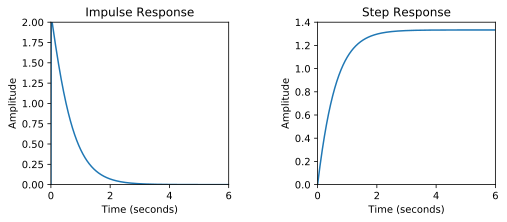

In [6]:
Ts = 1.e-2
t = np.arange(0,6,Ts)
a = np.array([1,-2+5*Ts+6*Ts*Ts,1-5*Ts]) 
b = np.array([0,2*Ts+8*Ts*Ts,-2*Ts])

x1= np.zeros(len(t))
x1[0] = 1/Ts
x2= np.ones(len(t))

y1 = sgl.lfilter(b,a,x1)
y2 = sgl.lfilter(b,a,x2)

fig, ax = plt.subplots(1,2,figsize=(8.0, 3.0))
ax[0].plot(t,y1)
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Impulse Response')
ax[0].axis([0,6,0,2])
ax[1].plot(t,y2)
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Amplitude')
ax[1].axis([0,6,0,1.4])
ax[1].set_title('Step Response')
fig.subplots_adjust(wspace=0.5)
plt.show()

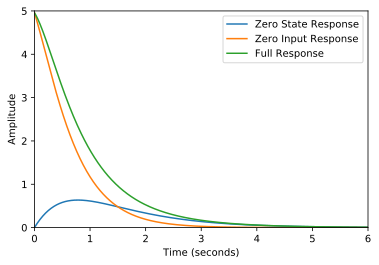

In [7]:
x = np.exp(-t) # Input signal.
xz= np.zeros(len(x))
z = sgl.lfiltic(b,a,[5,5+4*Ts]) # Initial conditions

yzs = sgl.lfilter(b,a,x);
yzio= sgl.lfilter(b,a,xz,-1,z)
yzi = yzio[0]

fig, ax = plt.subplots(figsize=(6.0, 4.0))
ax.plot(t,yzs,label='Zero State Response')
ax.plot(t,yzi,label='Zero Input Response')
ax.plot(t,yzs+yzi,label='Full Response')
ax.axis([0,6,0,5])
ax.legend()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
plt.show()

## 3

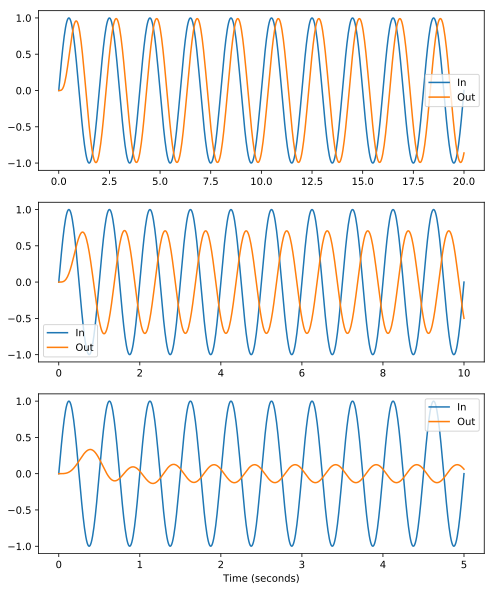

In [8]:
wc = 2*np.pi
fc = 1
sys = sgl.lti(wc*wc*wc,[1, 2*wc, 2*wc*wc, wc*wc*wc])

f = [fc/2, fc, fc*2]
fig, ax = plt.subplots(3,1,figsize=(8.0, 10.0))
for k in range(0,3):
    t = np.linspace(0,10/f[k],600)
    x = np.sin(2*np.pi*f[k]*t)
    to, y, u = sgl.lsim(sys, x, t)
    ax[k].plot(t,x,label='In')
    ax[k].plot(t,y,label='Out')
    ax[k].legend()
ax[2].set_xlabel('Time (seconds)') 
plt.show()

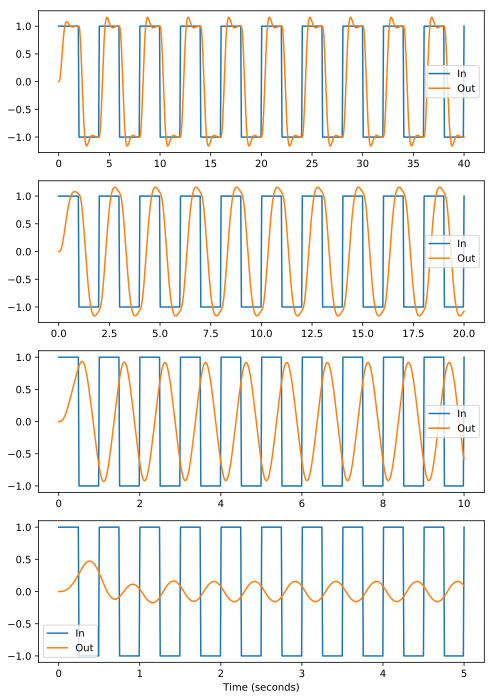

In [9]:
f = [fc/4, fc/2, fc, fc*2]
fig, ax = plt.subplots(4,1,figsize=(8.0, 12.0))
for k in range(0,4):
    t = np.linspace(0,10/f[k],600)
    x = sgl.square(2*np.pi*f[k]*t)
    to, y, u = sgl.lsim(sys, x, t)
    ax[k].plot(t,x,label='In')
    ax[k].plot(t,y,label='Out')
    ax[k].legend()
ax[3].set_xlabel('Time (seconds)') 
plt.show()